# EDA of Merged Dataset


In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab as py
import platform
import os
import socket
from platform import python_version
from datetime import datetime

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('merged_data.csv')

In [3]:
print(df.shape)

(174914, 14)


In [4]:
df.dtypes

Richtung                    int64
AnzFahrzeuge              float64
Luftfeuchtigkeit (%Hr)    float64
Luftdruck (hPa)           float64
Niederschlag                int64
Temperatur (°C)           float64
Time                       object
Date                       object
holiday                     int64
Hour                        int64
Weekday                     int64
Year                        int64
Month                       int64
Day                         int64
dtype: object

In [5]:
df.head()

,Richtung,AnzFahrzeuge,Luftfeuchtigkeit (%Hr),Luftdruck (hPa),Niederschlag,Temperatur (°C),Time,Date,holiday,Hour,Weekday,Year,Month,Day
0,0,4043.0,92.51,970.12,1,7.58,00:00:00,2012-01-01,1,0,6,2012,1,1
1,1,2931.0,92.51,970.12,1,7.58,00:00:00,2012-01-01,1,0,6,2012,1,1
2,0,11021.0,91.00,970.09,1,7.98,01:00:00,2012-01-01,1,1,6,2012,1,1
3,1,6660.0,91.00,970.09,1,7.98,01:00:00,2012-01-01,1,1,6,2012,1,1
4,0,7892.0,90.38,970.46,0,7.62,02:00:00,2012-01-01,1,2,6,2012,1,1


In [6]:
df.describe()

,Richtung,AnzFahrzeuge,Luftfeuchtigkeit (%Hr),Luftdruck (hPa),Niederschlag,Temperatur (°C),holiday,Hour,Weekday,Year,Month,Day
count,174914.000000,174914.000000,174914.000000,174914.000000,174914.000000,174914.000000,174914.000000,174914.000000,174914.000000,174914.000000,174914.000000,174914.000000
mean,0.500000,10841.611175,69.847934,967.717528,0.240244,11.858565,0.024675,11.501081,2.999737,2016.496164,6.520267,15.730256
std,0.500001,7032.554767,16.923140,7.676592,0.427233,7.969407,0.155133,6.921944,1.999974,2.871817,3.449701,8.797905
min,0.000000,11.000000,13.270000,929.090000,0.000000,-13.160000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000
25%,0.000000,3939.250000,58.470000,963.620000,0.000000,5.490000,0.000000,6.000000,1.000000,2014.000000,4.000000,8.000000
50%,0.500000,10988.000000,73.390000,968.120000,0.000000,11.540000,0.000000,12.000000,3.000000,2016.000000,7.000000,16.000000
75%,1.000000,16192.000000,83.780000,972.390000,0.000000,17.770000,0.000000,18.000000,5.000000,2019.000000,10.000000,23.000000
max,1.000000,32057.000000,99.970000,992.960000,1.000000,36.130000,1.000000,23.000000,6.000000,2021.000000,12.000000,31.000000


In [7]:
df.quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,Richtung,AnzFahrzeuge,Luftfeuchtigkeit (%Hr),Luftdruck (hPa),Niederschlag,Temperatur (°C),holiday,Hour,Weekday,Year,Month,Day
0.05,0.0,996.00,37.30,954.04,0.0,0.22,0.0,1.0,0.0,2012.0,1.0,2.0
0.10,0.0,1526.00,44.03,957.80,0.0,1.82,0.0,2.0,0.0,2012.0,2.0,4.0
0.25,0.0,3939.25,58.47,963.62,0.0,5.49,0.0,6.0,1.0,2014.0,4.0,8.0
0.50,0.5,10988.00,73.39,968.12,0.0,11.54,0.0,12.0,3.0,2016.0,7.0,16.0
0.75,1.0,16192.00,83.78,972.39,0.0,17.77,0.0,18.0,5.0,2019.0,10.0,23.0
0.90,1.0,19787.70,89.05,976.93,1.0,22.52,0.0,21.0,6.0,2020.0,11.0,28.0
0.95,1.0,22840.00,91.06,980.08,1.0,25.32,0.0,22.0,6.0,2021.0,12.0,29.0


In [8]:
df.skew()

Richtung                  0.000000
AnzFahrzeuge              0.212505
Luftfeuchtigkeit (%Hr)   -0.673843
Luftdruck (hPa)          -0.442587
Niederschlag              1.216008
Temperatur (°C)           0.178607
holiday                   6.128036
Hour                     -0.000095
Weekday                   0.000044
Year                      0.001670
Month                    -0.009007
Day                       0.004759
dtype: float64

In [9]:
df.kurtosis()

Richtung                  -2.000023
AnzFahrzeuge              -0.916967
Luftfeuchtigkeit (%Hr)    -0.414765
Luftdruck (hPa)            0.893044
Niederschlag              -0.521330
Temperatur (°C)           -0.565572
holiday                   35.553227
Hour                      -1.204035
Weekday                   -1.250045
Year                      -1.223629
Month                     -1.209753
Day                       -1.193561
dtype: float64

In [10]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['AnzFahrzeuge', 'Richtung', 'Temperatur (°C)', 'Niederschlag']],
               index=['Richtung'],
               values=['AnzFahrzeuge', 'Temperatur (°C)', 'Niederschlag'],
               aggfunc=np.mean)

,AnzFahrzeuge,Niederschlag,Temperatur (°C)
Richtung,,,
0,10255.472026,0.240244,11.858565
1,11427.750323,0.240244,11.858565


In [11]:
pd.pivot_table(df[['AnzFahrzeuge', 'holiday', 'Temperatur (°C)', 'Niederschlag']],
               index=['holiday'],
               values=['AnzFahrzeuge', 'Temperatur (°C)', 'Niederschlag'],
               aggfunc=np.mean)

,AnzFahrzeuge,Niederschlag,Temperatur (°C)
holiday,,,
0,10946.211661,0.239932,11.855669
1,6707.080630,0.252549,11.973063


In [12]:
corr = df.corr()
corr

,Richtung,AnzFahrzeuge,Luftfeuchtigkeit (%Hr),Luftdruck (hPa),Niederschlag,Temperatur (°C),holiday,Hour,Weekday,Year,Month,Day
Richtung,1.000000e+00,0.083347,7.441280e-20,1.359605e-18,1.233106e-19,2.253966e-20,1.439697e-19,2.083374e-19,1.840732e-20,4.294669e-17,-7.948574e-20,-2.308647e-20
AnzFahrzeuge,8.334678e-02,1.000000,-3.138780e-01,-2.030357e-02,-2.264223e-02,1.475379e-01,-9.351216e-02,3.854503e-01,-1.333812e-01,-2.387318e-02,9.683381e-03,5.879891e-03
Luftfeuchtigkeit (%Hr),7.441280e-20,-0.313878,1.000000e+00,-3.530414e-02,3.432135e-01,-5.528681e-01,-4.139922e-02,-2.727184e-01,1.139169e-02,-5.305713e-02,1.730304e-01,-3.074987e-02
Luftdruck (hPa),1.359605e-18,-0.020304,-3.530414e-02,1.000000e+00,-2.377992e-01,-3.289820e-02,-1.454465e-02,-1.656957e-02,-1.849181e-02,-1.322537e-02,8.382971e-02,3.899897e-02
Niederschlag,1.233106e-19,-0.022642,3.432135e-01,-2.377992e-01,1.000000e+00,-1.634023e-01,4.581080e-03,4.611922e-03,9.427919e-03,-4.260722e-02,-6.206057e-02,-1.833559e-02
Temperatur (°C),2.253966e-20,0.147538,-5.528681e-01,-3.289820e-02,-1.634023e-01,1.000000e+00,2.285207e-03,1.418944e-01,9.841239e-03,2.615574e-02,1.710635e-01,1.554353e-02
holiday,1.439697e-19,-0.093512,-4.139922e-02,-1.454465e-02,4.581080e-03,2.285207e-03,1.000000e+00,1.774862e-04,6.875673e-03,3.151306e-04,-5.411431e-02,-4.218914e-02
Hour,2.083374e-19,0.385450,-2.727184e-01,-1.656957e-02,4.611922e-03,1.418944e-01,1.774862e-04,1.000000e+00,5.216100e-04,-9.628220e-05,-4.580919e-05,3.231314e-04
Weekday,1.840732e-20,-0.133381,1.139169e-02,-1.849181e-02,9.427919e-03,9.841239e-03,6.875673e-03,5.216100e-04,1.000000e+00,3.770801e-04,-3.497472e-04,-6.090296e-04
Year,4.294669e-17,-0.023873,-5.305713e-02,-1.322537e-02,-4.260722e-02,2.615574e-02,3.151306e-04,-9.628220e-05,3.770801e-04,1.000000e+00,-1.653868e-03,-9.300011e-04


In [13]:
cov = df.cov()
cov

,Richtung,AnzFahrzeuge,Luftfeuchtigkeit (%Hr),Luftdruck (hPa),Niederschlag,Temperatur (°C),holiday,Hour,Weekday,Year,Month,Day
Richtung,0.250001,2.930712e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AnzFahrzeuge,293.071250,4.945683e+07,-37355.534104,-1096.109565,-68.029419,8268.807233,-102.020055,18763.314939,-1875.996678,-482.147870,234.920834,363.799120
Luftfeuchtigkeit (%Hr),0.000000,-3.735553e+04,286.392657,-4.586434,2.481474,-74.563873,-0.108687,-31.946508,0.385561,-2.578585,10.101475,-4.578293
Luftdruck (hPa),0.000000,-1.096110e+03,-4.586434,58.930072,-0.779908,-2.012642,-0.017321,-0.880456,-0.283905,-0.291563,2.219974,2.633910
Niederschlag,0.000000,-6.802942e+01,2.481474,-0.779908,0.182528,-0.556351,0.000304,0.013639,0.008056,-0.052276,-0.091466,-0.068919
Temperatur (°C),0.000000,8.268807e+03,-74.563873,-2.012642,-0.556351,63.511449,0.002825,7.827433,0.156856,0.598618,4.702890,1.089821
holiday,0.000000,-1.020201e+02,-0.108687,-0.017321,0.000304,0.002825,0.024066,0.000191,0.002133,0.000140,-0.028960,-0.057582
Hour,0.000000,1.876331e+04,-31.946508,-0.880456,0.013639,7.827433,0.000191,47.913307,0.007221,-0.001914,-0.001094,0.019678
Weekday,0.000000,-1.875997e+03,0.385561,-0.283905,0.008056,0.156856,0.002133,0.007221,3.999897,0.002166,-0.002413,-0.010716
Year,0.000000,-4.821479e+02,-2.578585,-0.291563,-0.052276,0.598618,0.000140,-0.001914,0.002166,8.247334,-0.016385,-0.023497


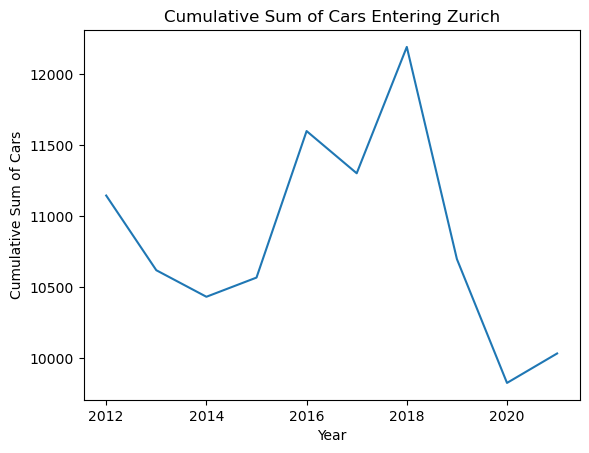

In [14]:
# Extract the year and month from the 'Date' column

df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group the filtered data by 'Year' and 'Month' and calculate the sum of 'AnzFahrzeuge'
grouped_df = df.groupby(['Year'])['AnzFahrzeuge'].mean()

# Calculate the cumulative sum of 'AnzFahrzeuge' for each month
cumulative_sum = grouped_df.groupby('Year').cumsum()

# Generate the x-axis values
x = grouped_df.index

# Generate the y-axis values
y = cumulative_sum.values

# Plot the line graph
plt.plot(x, y)
plt.title('Cumulative Sum of Cars Entering Zurich')
plt.xlabel('Year')
plt.ylabel('Cumulative Sum of Cars')
plt.show()

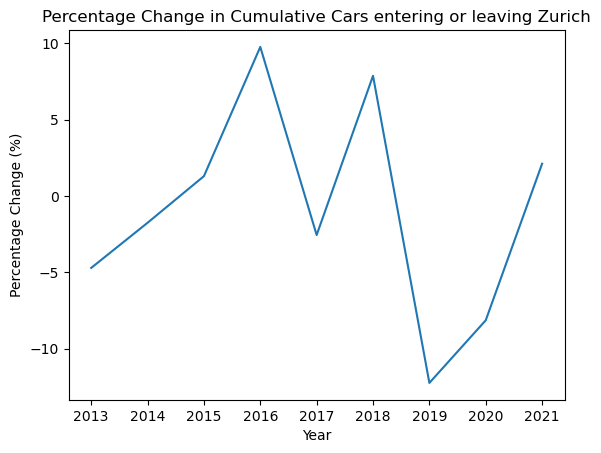

In [15]:
# Extract the year from the 'Date' column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group the filtered data by 'Year' and calculate the cumulative sum of 'AnzFahrzeuge'
grouped_df = df.groupby('Year')['AnzFahrzeuge'].mean()

# Calculate the percentage change in relation to the previous year
percentage_change = grouped_df.pct_change() * 100

# Generate the x-axis values
x = percentage_change.index[1:]  # Exclude the first year

# Generate the y-axis values
y = percentage_change.values[1:]  # Exclude the first year

# Plot the line graph
plt.plot(x, y)
plt.title('Percentage Change in Cumulative Cars entering or leaving Zurich')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.show()

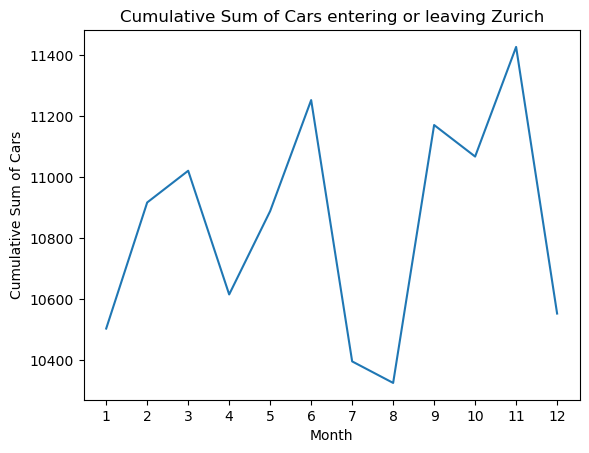

In [16]:
# Extract the year and month from the 'Date' column
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Group the filtered data by 'Year' and 'Month' and calculate the sum of 'AnzFahrzeuge'
grouped_df = df.groupby([ 'Month'])['AnzFahrzeuge'].mean()

# Calculate the cumulative sum of 'AnzFahrzeuge' for each month
cumulative_sum = grouped_df.groupby('Month').cumsum()

# Generate the x-axis values
x = grouped_df.index

# Generate the y-axis values
y = cumulative_sum.values

# Plot the line graph
plt.plot(x, y)
plt.title('Cumulative Sum of Cars entering or leaving Zurich')
plt.xlabel('Month')
plt.ylabel('Cumulative Sum of Cars')
plt.xticks(range(1, 13))
plt.show()

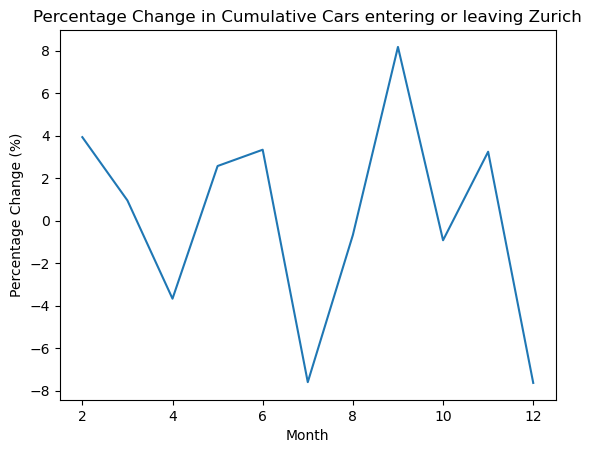

In [17]:
# Extract the year from the 'Date' column
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Group the filtered data by 'Year' and calculate the cumulative sum of 'AnzFahrzeuge'
grouped_df = df.groupby('Month')['AnzFahrzeuge'].mean()

# Calculate the percentage change in relation to the previous year
percentage_change = grouped_df.pct_change() * 100

# Generate the x-axis values
x = percentage_change.index[1:]  # Exclude the first year

# Generate the y-axis values
y = percentage_change.values[1:]  # Exclude the first year

# Plot the line graph
plt.plot(x, y)
plt.title('Percentage Change in Cumulative Cars entering or leaving Zurich')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.show()

<Axes: xlabel='AnzFahrzeuge'>

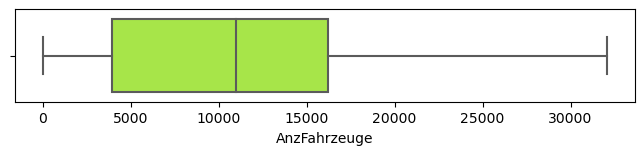

In [18]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['AnzFahrzeuge'], color="greenyellow")

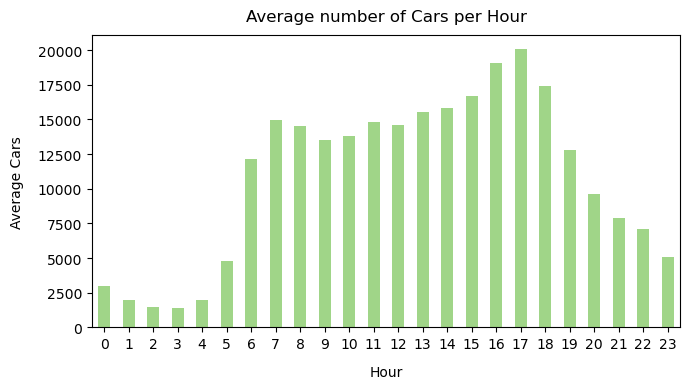

In [19]:
# Calculate the average 'AnzFahrzeuge' per hour
average_per_hour = df.groupby('Hour')['AnzFahrzeuge'].mean()

# Plot the average 'AnzFahrzeuge' per hour
fig, ax = plt.subplots(figsize=(7, 4))
average_per_hour.plot(kind='bar', color='#42AD12', alpha=0.5)

# Set labels and title
ax.set_xlabel('Hour', fontsize=10, labelpad=10)
ax.set_ylabel('Average Cars', fontsize=10, labelpad=10)
ax.set_title('Average number of Cars per Hour', fontsize=12, pad=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


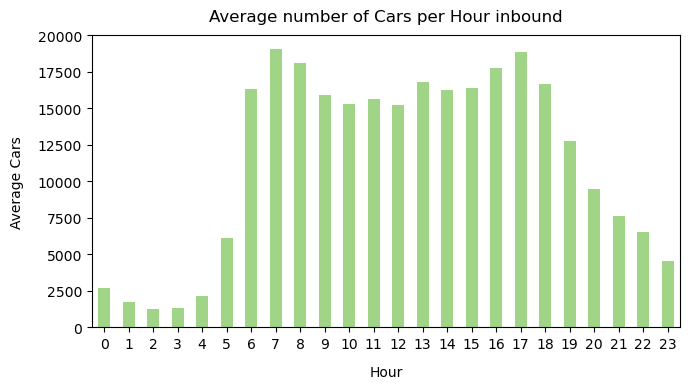

In [20]:
# Filter the data to include only rows where 'Richtung' is 1
filtered_df = df[df['Richtung'] == 1]

# Calculate the average 'AnzFahrzeuge' per hour
average_per_hour = filtered_df.groupby('Hour')['AnzFahrzeuge'].mean()

# Plot the average 'AnzFahrzeuge' per hour
fig, ax = plt.subplots(figsize=(7, 4))
average_per_hour.plot(kind='bar', color='#42AD12', alpha=0.5)

# Set labels and title
ax.set_xlabel('Hour', fontsize=10, labelpad=10)
ax.set_ylabel('Average Cars', fontsize=10, labelpad=10)
ax.set_title('Average number of Cars per Hour inbound', fontsize=12, pad=10)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

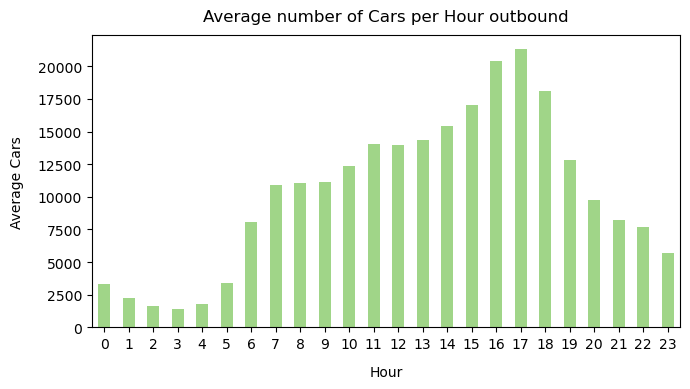

In [21]:
# Filter the data to include only rows where 'Richtung' is 1
filtered_df = df[df['Richtung'] == 0]

# Calculate the average 'AnzFahrzeuge' per hour
average_per_hour = filtered_df.groupby('Hour')['AnzFahrzeuge'].mean()

# Plot the average 'AnzFahrzeuge' per hour
fig, ax = plt.subplots(figsize=(7, 4))
average_per_hour.plot(kind='bar', color='#42AD12', alpha=0.5)

# Set labels and title
ax.set_xlabel('Hour', fontsize=10, labelpad=10)
ax.set_ylabel('Average Cars', fontsize=10, labelpad=10)
ax.set_title('Average number of Cars per Hour outbound', fontsize=12, pad=10)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

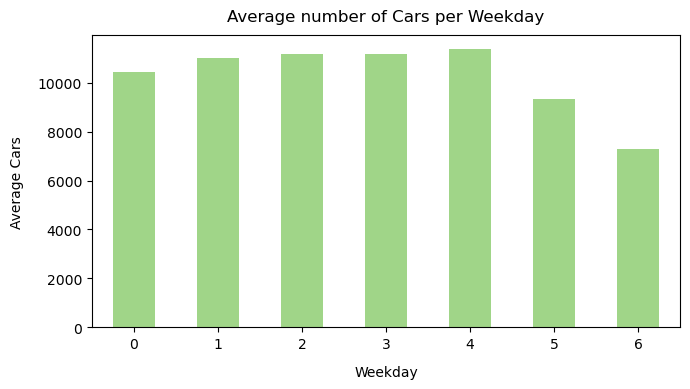

In [22]:

# Calculate the average 'AnzFahrzeuge' per hour
average_per_hour = filtered_df.groupby('Weekday')['AnzFahrzeuge'].mean()

# Plot the average 'AnzFahrzeuge' per hour
fig, ax = plt.subplots(figsize=(7, 4))
average_per_hour.plot(kind='bar', color='#42AD12', alpha=0.5)

# Set labels and title
ax.set_xlabel('Weekday', fontsize=10, labelpad=10)
ax.set_ylabel('Average Cars', fontsize=10, labelpad=10)
ax.set_title('Average number of Cars per Weekday', fontsize=12, pad=10)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

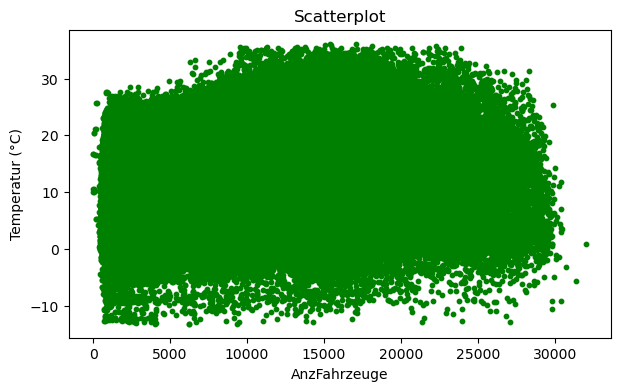

In [23]:
plt.figure(figsize=(7,4))

plt.scatter(df['AnzFahrzeuge'], 
           df['Temperatur (°C)'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('AnzFahrzeuge')
plt.ylabel('Temperatur (°C)')
plt.show()

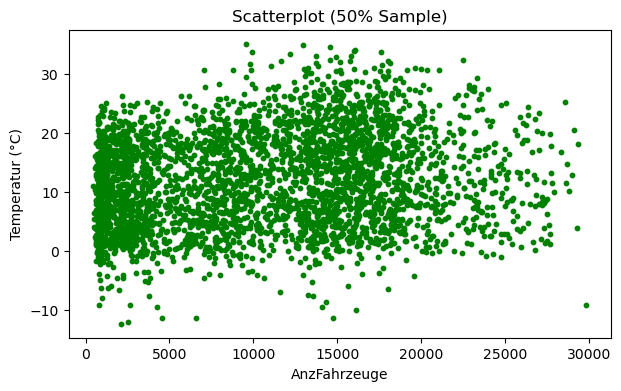

In [24]:
plt.figure(figsize=(7, 4))

# Randomly sample 2% of the data
sampled_df = df.sample(frac=0.02, random_state=42)

plt.scatter(sampled_df['AnzFahrzeuge'], 
            sampled_df['Temperatur (°C)'], 
            color="green", 
            alpha=1.0,
            s=10)
plt.title('Scatterplot (50% Sample)', fontsize=12)
plt.xlabel('AnzFahrzeuge')
plt.ylabel('Temperatur (°C)')
plt.show()


In [25]:
print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-06-17 02:38:34
Python Version: 3.10.11
-----------------------------------
